In [60]:
import numpy as np

def vonmises_walk(vm_bias=np.sqrt(2.),vm_amp=1.,kappa=0,n_steps=5, enforce_origin=True):
    phi0 = 2*np.pi*np.random.uniform()
    flip = 0
    if kappa < 0:
        kappa = -kappa
        flip = np.pi
    dphi = flip + np.random.vonmises(0,kappa,size=n_steps)
    dr = vm_bias+vm_amp*np.abs(np.random.normal(size=n_steps))
    if enforce_origin:
        dr[0]=0
    phi = phi0 + np.cumsum(dphi)
    dxy = dr*np.array([np.cos(phi),np.sin(phi)])
    xy = np.cumsum(dxy.T,axis=0)
    return xy
    

In [61]:
import matplotlib.pyplot as plt

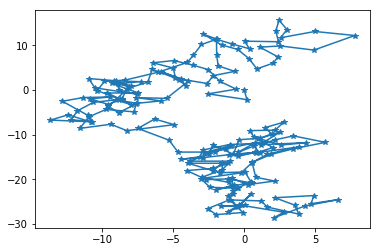

In [62]:
zz = vonmises_walk(n_steps=200)
plt.plot(zz[:,0],zz[:,1],'-*')

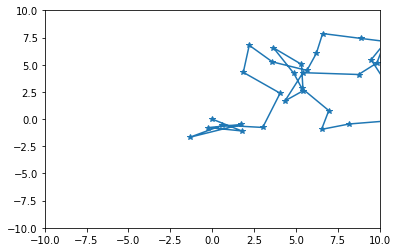

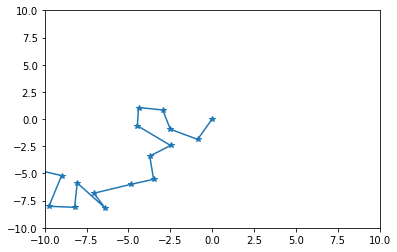

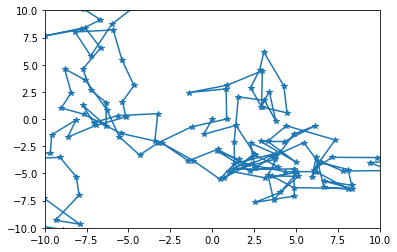

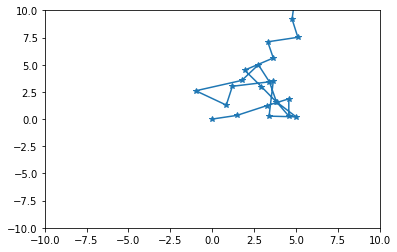

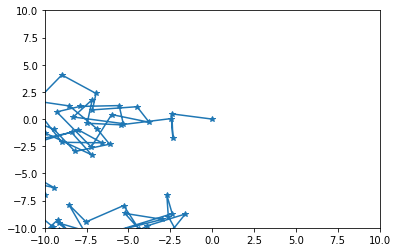

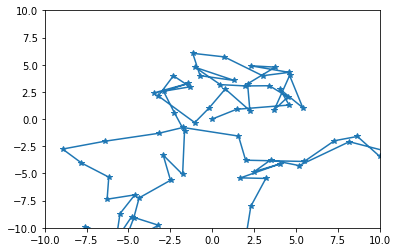

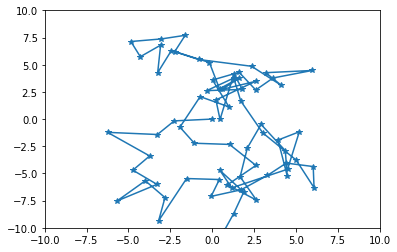

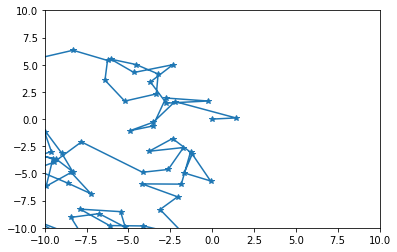

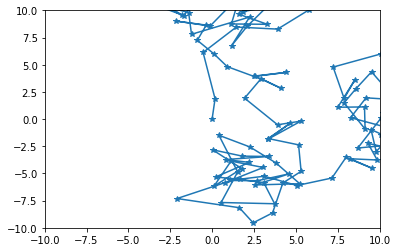

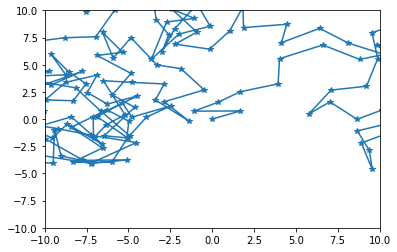

In [63]:
for uu in range(10):
    plt.figure()
    zz = vonmises_walk(n_steps=200)
    plt.plot(zz[:,0],zz[:,1],'-*')
    plt.xlim([-10,10])
    plt.ylim([-10,10])

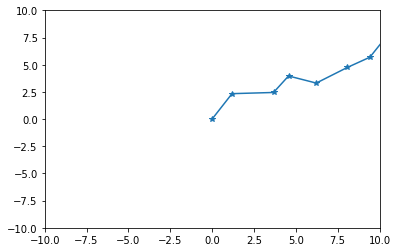

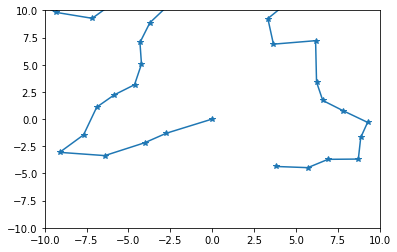

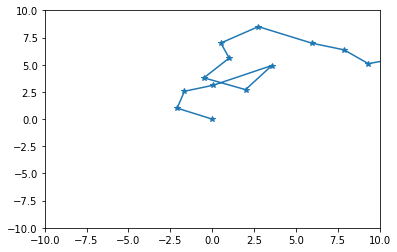

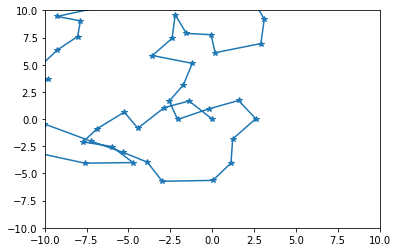

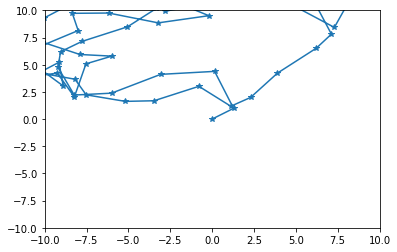

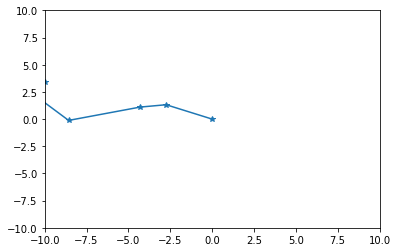

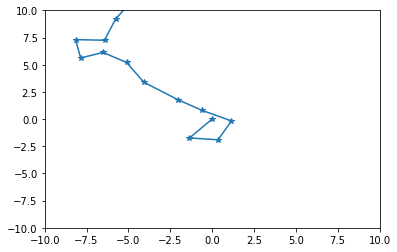

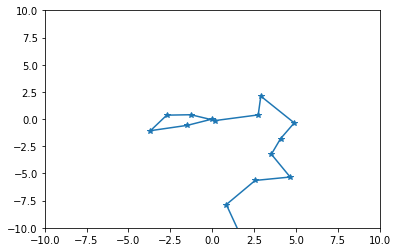

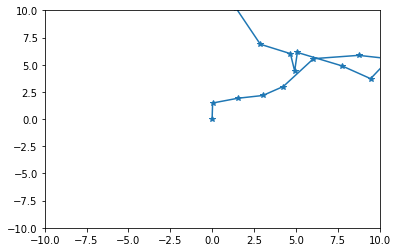

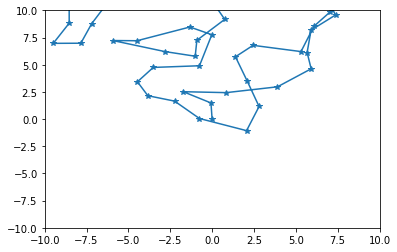

In [64]:
for uu in range(10):
    plt.figure()
    zz = vonmises_walk(n_steps=200, kappa=1.)
    plt.plot(zz[:,0],zz[:,1],'-*')
    plt.xlim([-10,10])
    plt.ylim([-10,10])

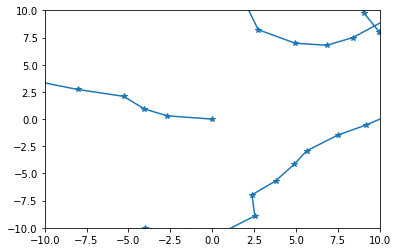

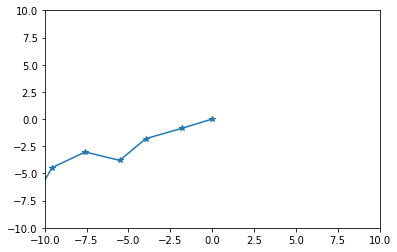

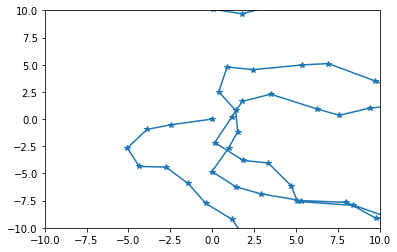

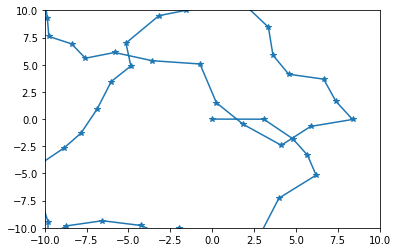

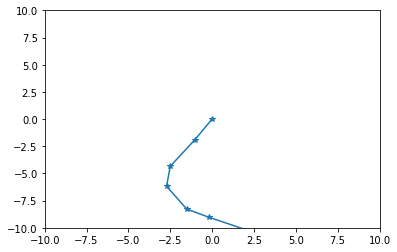

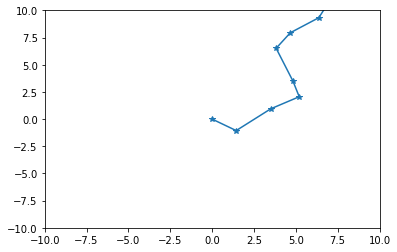

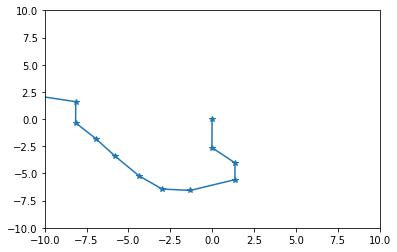

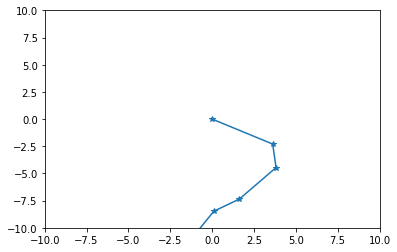

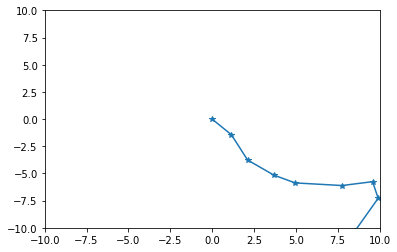

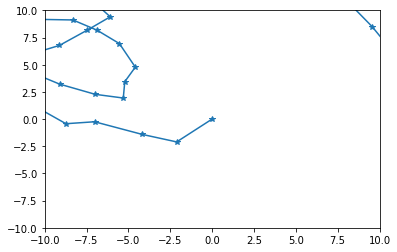

In [65]:
for uu in range(10):
    plt.figure()
    zz = vonmises_walk(n_steps=200, kappa=3.)
    plt.plot(zz[:,0],zz[:,1],'-*')
    plt.xlim([-10,10])
    plt.ylim([-10,10])

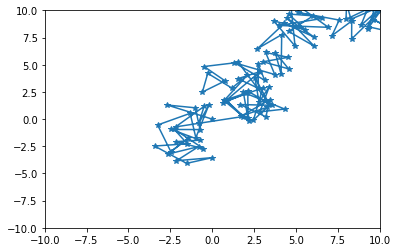

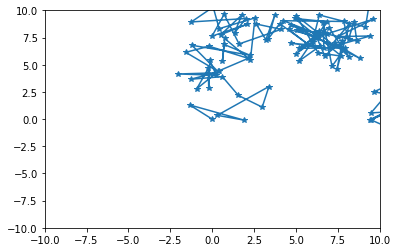

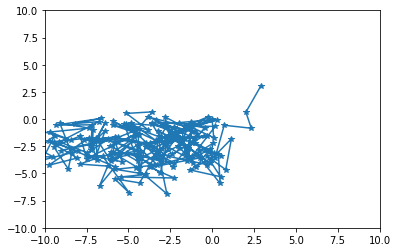

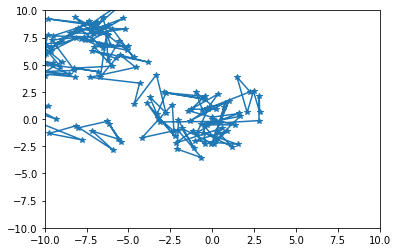

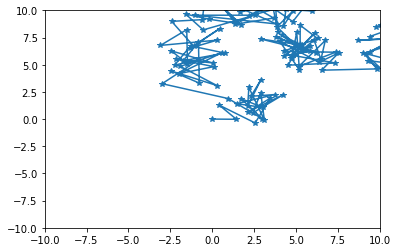

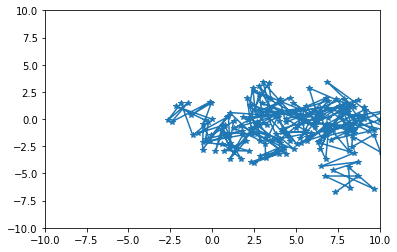

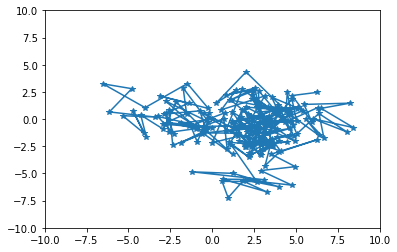

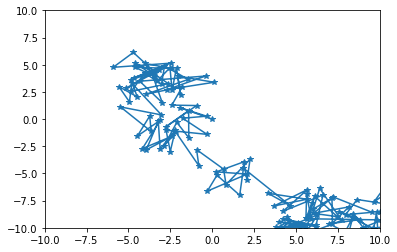

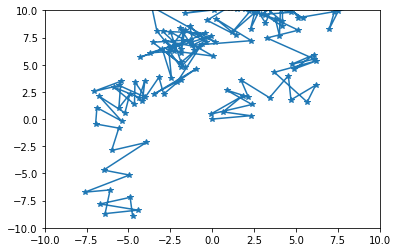

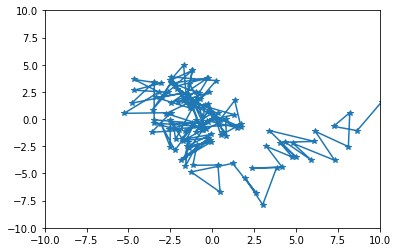

In [66]:
for uu in range(10):
    plt.figure()
    zz = vonmises_walk(n_steps=200, kappa=-2.)
    plt.plot(zz[:,0],zz[:,1],'-*')
    plt.xlim([-10,10])
    plt.ylim([-10,10])

In [67]:
%timeit zz = vonmises_walk(n_steps=200, kappa=-2.)

74.7 µs ± 673 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


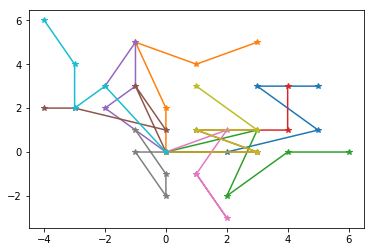

In [70]:
for uu in range(10):
    zz = vonmises_walk(n_steps=5, kappa=0.)
    zz = np.ceil(zz)
    plt.plot(zz[:,0],zz[:,1],'-*')


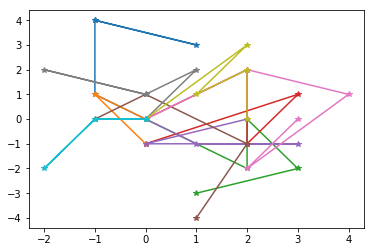

In [68]:
for uu in range(10):
    zz = vonmises_walk(n_steps=5, kappa=-1.)
    zz = np.ceil(zz)
    plt.plot(zz[:,0],zz[:,1],'-*')

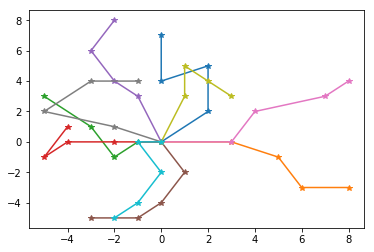

In [69]:
 for uu in range(10):
    zz = vonmises_walk(n_steps=5, kappa=1.)
    zz = np.ceil(zz)
    plt.plot(zz[:,0],zz[:,1],'-*')

In [81]:
dist2_vec=[]
for uu in range(100): 
    zz = vonmises_walk(n_steps=int(1e6))
    dist2 = (zz**2).sum(axis=1)
    dist2_vec.append(dist2+0.)
# plt.plot(dist2)

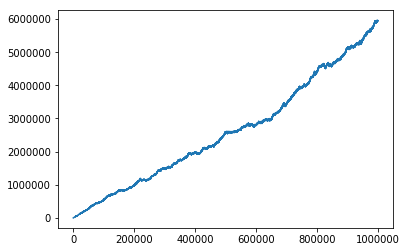

In [82]:
plt.plot(np.mean(dist2_vec,axis=0))

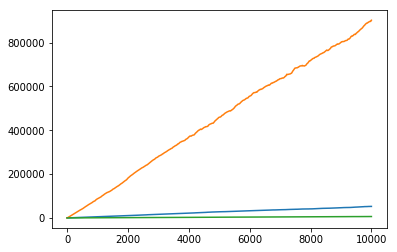

In [86]:
dist2_vec=[]
for uu in range(1000): 
    zz = vonmises_walk(n_steps=int(1e4))
    dist2 = (zz**2).sum(axis=1)
    dist2_vec.append(dist2+0.)
# plt.plot(dist2)
plt.plot(np.mean(dist2_vec,axis=0))

dist2_vec=[]
for uu in range(1000): 
    zz = vonmises_walk(n_steps=int(1e4), kappa=5)
    dist2 = (zz**2).sum(axis=1)
    dist2_vec.append(dist2+0.)
# plt.plot(dist2)
plt.plot(np.mean(dist2_vec,axis=0))

dist2_vec=[]
for uu in range(1000): 
    zz = vonmises_walk(n_steps=int(1e4), kappa=-5)
    dist2 = (zz**2).sum(axis=1)
    dist2_vec.append(dist2+0.)
# plt.plot(dist2)
plt.plot(np.mean(dist2_vec,axis=0))